In [2]:
import csv

import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import linregress, norm
import numpy as np
from scipy.stats import norm
import seaborn as sns 
import altair as alt   
from altair_saver import save


In [3]:
def channel_to_energy(channel, slope, intercept):
    # Convert channel number to energy using calibration constants
    return slope * channel + intercept

def convert_spe_to_csv(spe_file_path, slope, y_intercept):
    # Initialize lists to hold the data
    indices = []
    counts = []
    
    # Read the .Spe file content
    with open(spe_file_path, 'r') as file:
        content = file.readlines()
    
    # Flags to identify when the data section starts and when actual data starts
    data_section = False
    data_started = False
    
    for line in content:
        if line.startswith('$ROI:'):
            break  # Stop reading if we reach the $ROI: section
        if data_section and data_started:
            counts.append(int(line.strip()))  # Append count after stripping whitespace
            indices.append(len(counts))  # The index is simply the count of how many data points have been read
        if line.startswith('$DATA:'):
            data_section = True  # Set the flag to True, next lines will be data
        elif data_section and not data_started:
            data_started = True  # Skip the first line after $DATA:
    
    # Calculate the energy for each channel
    energies = [channel_to_energy(channel, slope, y_intercept) for channel in indices]
    
    # Define the CSV file path based on the .Spe file path
    csv_file_path = spe_file_path.replace('.Spe', '_with_energy.csv')
    
    # Writing the data along with the calculated energies to the CSV file
    with open(csv_file_path, 'w', newline='') as csvfile:
        writer = csv.writer(csvfile)
        writer.writerow(['Time', 'Count', 'Energy (keV)'])  # Writing the header
        writer.writerows(zip(indices, counts, energies))  # Writing the actual data
    
    return csv_file_path

---

# Convert SPE data to CSV with Calerbration

In [4]:
# Replace with your .Spe file path
spe_file_path1 = './Lab 2 Data/02-06-2024_Na22_measurement_01.Spe'

spe_file_path2 = './Lab 2 Data/02-08-2024_Co60_measurement_01.Spe'

spe_file_path3 = './Lab 2 Data/02-08-2024_Ca137_measurement_01.Spe'

spe_file_path4 = './Lab 2 Data/02-06-2024_Mg54_measurement_01.Spe'

spe_file_path5 = './Lab 2 Data/02-06-2024_Ba133_measure_01_note-do-not-know-if-calibration-good.Spe'

spe_file_path6 = './Lab 2 Data/2-12-2024_kcl_weekend.Spe'


# Calibration constants obtained previously for Na22
slope = 0.3014996053670087
y_intercept = -1109.560378847672

# Calling the function to convert .Spe to CSV for Na22
csv_file = convert_spe_to_csv(spe_file_path1, slope, y_intercept)
print(f"CSV file created at: {csv_file}")

# Calibration constants obtained previously for Co60 and for Ca137
slope =  0.287002
y_intercept = -848.529724

# Calling the function to convert .Spe to CSV for Co60 
csv_file = convert_spe_to_csv(spe_file_path2, slope, y_intercept)
print(f"CSV file created at: {csv_file}")

# Calling the function to convert .Spe to CSV for Co60 
csv_file = convert_spe_to_csv(spe_file_path3, slope, y_intercept)
print(f"CSV file created at: {csv_file}")

# Calling the function to convert .Spe to CSV for Co60 
csv_file = convert_spe_to_csv(spe_file_path4, slope, y_intercept)
print(f"CSV file created at: {csv_file}")

# Calling the function to convert .Spe to CSV for Co60 
csv_file = convert_spe_to_csv(spe_file_path5, slope, y_intercept)
print(f"CSV file created at: {csv_file}")

# Calling the function to convert .Spe to CSV for Co60 
csv_file = convert_spe_to_csv(spe_file_path6, slope, y_intercept)
print(f"CSV file created at: {csv_file}")

CSV file created at: ./Lab 2 Data/02-06-2024_Na22_measurement_01_with_energy.csv
CSV file created at: ./Lab 2 Data/02-08-2024_Co60_measurement_01_with_energy.csv
CSV file created at: ./Lab 2 Data/02-08-2024_Ca137_measurement_01_with_energy.csv
CSV file created at: ./Lab 2 Data/02-06-2024_Mg54_measurement_01_with_energy.csv
CSV file created at: ./Lab 2 Data/02-06-2024_Ba133_measure_01_note-do-not-know-if-calibration-good_with_energy.csv
CSV file created at: ./Lab 2 Data/2-12-2024_kcl_weekend_with_energy.csv


In [44]:
Na22_data = pd.read_csv("./Lab 2 Data/02-06-2024_Na22_measurement_01_with_energy.csv")
Co60_data = pd.read_csv("./Lab 2 Data/02-08-2024_Co60_measurement_01_with_energy.csv")
Ca137_data = pd.read_csv("./Lab 2 Data/02-08-2024_Ca137_measurement_01_with_energy.csv")
Mg54_data = pd.read_csv("./Lab 2 Data/02-06-2024_Mg54_measurement_01_with_energy.csv")
Ba133_data = pd.read_csv("./Lab 2 Data/02-06-2024_Ba133_measure_01_note-do-not-know-if-calibration-good_with_energy.csv")
KCl_data = pd.read_csv("./Lab 2 Data/2-12-2024_kcl_weekend_with_energy.csv")


Na22_data.head()

Time  Count  Energy (keV)
0     1      0  -1109.258879
1     2      0  -1108.957380
2     3      0  -1108.655880
3     4      0  -1108.354380
4     5      0  -1108.052881

---

# Gaussian fit 

In [6]:
# Define a Gaussian function for fitting
def gaussian(x, amplitude, mean, stddev):
    return amplitude * np.exp(-((x - mean) / 2 / stddev) ** 2)

def compton_edge_fit(x, A, B, C, edge):
    return (A / (1.0 + np.exp((x - edge) / B)) + C)


alt.data_transformers.disable_max_rows()

DataTransformerRegistry.enable('default')

# Na22 Data

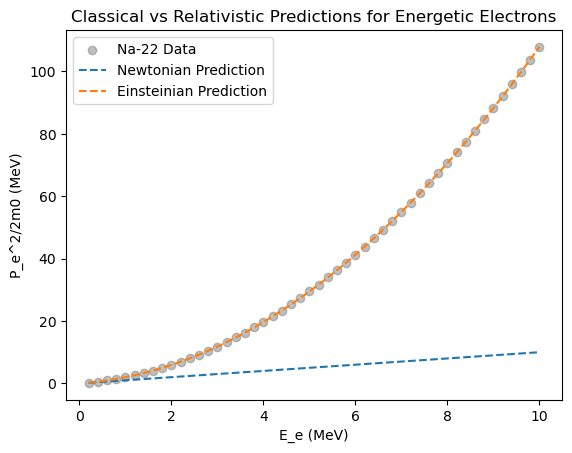

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Constants
m0 = 0.511  # electron rest mass energy in MeV/c^2

# Example DataFrame setup
# Replace this with your actual data loading code
data = pd.DataFrame({
    'E_e': np.linspace(0.2, 10, 50)  # Kinetic energy values from 0.2 to 10 MeV
})
data['P_e'] = np.sqrt(data['E_e'] * (data['E_e'] + 2 * m0))  # Calculate electron momentum
data['P_e^2/2m0'] = data['P_e']**2 / (2 * m0)  # Calculate P_e^2 / 2m0

# Plotting
plt.scatter(data['E_e'], data['P_e^2/2m0'], label='Na-22 Data', color='gray', alpha=0.5)
4
plt.plot(data['E_e'], data['E_e'], label='Newtonian Prediction', linestyle='--')

plt.plot(data['E_e'], data['P_e^2/2m0'], label='Einsteinian Prediction', linestyle='--')

plt.xlabel('E_e (MeV)')
plt.ylabel('P_e^2/2m0 (MeV)')
plt.title('Classical vs Relativistic Predictions for Energetic Electrons')
plt.legend()
plt.show()


In [19]:
threshold = 10  # Set the threshold value for filtering the data

# Filter the counts based on the threshold
Na22_data_Filtered = Na22_data[Na22_data['Count'] >= threshold]
data_array = Na22_data_Filtered[['Energy (keV)', 'Count']].values

energy_data = data_array[:, 0]
count_data = data_array[:, 1]

energy_data_edge = energy_data[200:1400]
count_data_edge = count_data[200:1400]

# # visually estimate the parameters for the Gaussian peaks, such as the approximate 
# # height (amplitude), center (mean), and width (standard deviation).
# # For example:
# params_511, _ = curve_fit(gaussian, energy_data, count_data, p0=[amplitude_guess, 511, stddev_guess])

params_511, cov_511 = curve_fit(gaussian, energy_data, count_data, p0=[1760, 511, 200], bounds=([800, 511, 0], [1800, 512, 300]))
params_1274, cov_1274 = curve_fit(gaussian, energy_data, count_data, p0=[600, 1274, 200],bounds=([500, 1273, 0], [650, 1274, 250]))
# params_511_edge, _ = curve_fit(compton_edge_fit, energy_data_edge, count_data_edge, p0=[-100, -25, 1, -165])


# # After fitting, params_511 and params_1274 will have the fitted parameters of your Gaussians
fitted_511 = gaussian(Na22_data_Filtered['Energy (keV)'].values, *params_511)
fitted_1274 = gaussian(Na22_data_Filtered['Energy (keV)'].values, *params_1274)
# fitted_511_edge = compton_edge_fit(Na22_data_Filtered['Energy (keV)'].values, *params_511_edge)

# Create DataFrames for the fitted curves
fitted_511_df = pd.DataFrame({
    'Energy (keV)': Na22_data_Filtered['Energy (keV)'],
    'Count': fitted_511
})

fitted_1274_df = pd.DataFrame({
    'Energy (keV)': Na22_data_Filtered['Energy (keV)'] ,
    'Count': fitted_1274
})


# Create the Altair chart for raw data
raw_data_chart = alt.Chart(Na22_data_Filtered).mark_line().encode(
    x='Energy (keV)',
    y='Count'
).properties(
    title='Energy vs. Count for Na22',
    width=800
).interactive()

# Create Altair charts for the fitted Gaussians
fitted_511_chart = alt.Chart(fitted_511_df).mark_line(color='red').encode(
    x='Energy (keV)',
    y='Count'
)

fitted_1274_chart = alt.Chart(fitted_1274_df).mark_line(color='orange').encode(
    x='Energy (keV)',
    y='Count'
)

# Combine the charts
final_chart = raw_data_chart + fitted_511_chart + fitted_1274_chart

# Add vertical line markers for significant energies (like Compton edges and photopeaks)
significant_energies = [175, 511, 1100, 1274]  # Replace with actual energies

for energy in significant_energies:
    final_chart += alt.Chart(
        pd.DataFrame(
            {'x': [energy]}
            )
        ).mark_rule(
            color='darkgreen', 
            strokeDash=[9,4]
        ).encode(
            x='x:Q'
        )



final_chart.save('Na22.png', ppi=200, engine="vl-convert")
final_chart

alt.LayerChart(...)

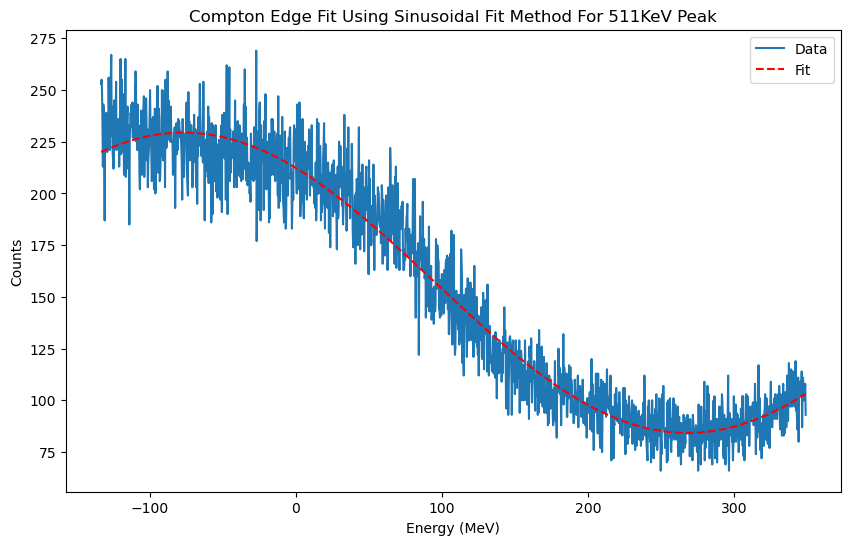

Fitted parameters: [-7.25788692e+01  9.11134015e-03  5.41330765e+00  1.56837007e+02]


In [18]:
# Define the sinusoidal fit function
def sinusoidal_fit(x, A, B, C, D):
    """
    A sinusoidal fit function.
    A: Amplitude of the sine wave
    B: Frequency of the sine wave
    C: Phase shift of the sine wave
    D: Vertical shift of the sine wave
    """
    return A * np.sin(B * x + C) + D

# Assuming x_data and y_data are your data arrays
x_data = energy_data[3200:4800]  # Energy
y_data =count_data[3200:4800]  # Intensity

# Initial guess for the parameters [A, B, C, D]
# You need to provide a reasonable starting guess based on your data
initial_guess = [max(y_data), 0.0001 , 4, min(y_data)]

# Use curve_fit to fit the sinusoidal function to the data
popt, pcov = curve_fit(sinusoidal_fit, x_data, y_data, p0=initial_guess)

# Plot the data and the fit
plt.figure(figsize=(10, 6))
plt.plot(x_data, y_data, label='Data')
plt.plot(x_data, sinusoidal_fit(x_data, *popt), label='Fit', linestyle='--', color='red')
plt.xlabel('Energy (MeV)')
plt.ylabel('Counts')
plt.title('Compton Edge Fit Using Sinusoidal Fit Method For 511KeV Peak')
plt.legend()
plt.show()

print("Fitted parameters:", popt)

In [11]:
from scipy.optimize import curve_fit, root
import numpy as np
import matplotlib.pyplot as plt
from scipy.misc import derivative

# Define the sinusoidal fit function
def sinusoidal_fit(x, A, B, C, D):
    return A * np.sin(B * x + C) + D

# Define a function to compute the second derivative of the sinusoidal fit function
def second_derivative_sinusoidal_fit(x, A, B, C):
    # The second derivative of A*sin(B*x + C) with respect to x is -A*B^2*sin(B*x + C)
    return -A * B**2 * np.sin(B * x + C)


# Assuming x_data and y_data are your data arrays
x_data = energy_data[3200:4800]  # Energy
y_data = count_data[3200:4800]  # Intensity


# Initial guess for the parameters [A, B, C, D]
initial_guess = [max(y_data), 0.0001, 4, min(y_data)]

# Use curve_fit to fit the sinusoidal function to the data
popt, pcov = curve_fit(sinusoidal_fit, x_data, y_data, p0=initial_guess)

# prints the root value of the second derivative of the sinusoidal fit function
print( root(second_derivative_sinusoidal_fit, x0=96, args=(popt[0], popt[1], popt[2])).x ) 


[95.47197664]


In [12]:
uncertanties_511 = np.sqrt(np.diag(cov_511))

print("Uncertainty values for params_511:")
print("Amplitude:", uncertanties_511[0])
print("Mean:", uncertanties_511[1])
print("Standard Deviation:", uncertanties_511[2])

print()

# Get the diagonal elements of the covariance matrix
uncertainties_1274 = np.sqrt(np.diag(cov_1274))

# Print the uncertainty values
print("Uncertainty values for params_1274:")
print("Amplitude:", uncertainties_1274[0])
print("Mean:", uncertainties_1274[1])
print("Standard Deviation:", uncertainties_1274[2])

Uncertainty values for params_511:
Amplitude: 14.189349862609358
Mean: 0.40169174370852023
Standard Deviation: 0.2840389560107692

Uncertainty values for params_1274:
Amplitude: 30.26882158625162
Mean: 2.0571692421093584
Standard Deviation: 1.4550826420516054


In [14]:
# Assuming params_511 and params_1274 are the output from the curve_fit function
peak_energy_511 = params_511[1]  # Center of the 511 keV peak fit
peak_energy_1274 = params_1274[1]  # Center of the 1274 keV peak fit


print(f"Peak energy for the 511 keV peak: {peak_energy_511:.2f} keV")
print(f"Peak energy for the 1274 keV peak: {peak_energy_1274:.2f} keV")
print()

# Constants
m_e_c2 = 511  # electron rest mass energy in keV

# Function to calculate the Compton edge energy for a given photopeak energy
def compton_edge_energy(E_peak):
    return E_peak - ((2 * E_peak**2) / (m_e_c2 + 2 * E_peak))

# Calculate Compton edge energies for the fitted peaks
compton_edge_511 = compton_edge_energy(peak_energy_511)
compton_edge_1274 = compton_edge_energy(peak_energy_1274)


print(f"Compton edge for 511 keV peak: {compton_edge_511:.2f} keV")
print(f"Compton edge for 1274 keV peak: {compton_edge_1274:.2f} keV")


Peak energy for the 511 keV peak: 511.00 keV
Peak energy for the 1274 keV peak: 1273.00 keV

Compton edge for 511 keV peak: 170.33 keV
Compton edge for 1274 keV peak: 212.79 keV


# Co60 Data

In [20]:
threshold = 10  # Set the threshold value

# Filter the counts based on the threshold and energy greater than 900 KeV
Co60_data_Filtered = Co60_data[(Co60_data['Count'] >= threshold) & (Co60_data['Energy (keV)'] > -790)]

# Create the Altair chart with log scale
alt.Chart(Co60_data_Filtered).mark_line().encode(
    x='Energy (keV)',
    y=alt.Y('Count')  # Set the y-axis scale to log
).interactive().properties(
    title='Energy vs. Count for Co60',
    width=800
)


alt.Chart(...)

# Ca137 Data

In [40]:
threshold = 10  # Set the threshold value

# Filter the counts based on the threshold
Ca137_data_Filtered = Ca137_data[Ca137_data['Count'] >= threshold]

# Create the Altair chart with log scale
alt.Chart(Ca137_data_Filtered).mark_line().encode(
    x='Energy (keV)',
    y=alt.Y('Count', 
    scale=alt.Scale(type='log'))  # Set the y-axis scale to log
).interactive().properties(
    title='Energy vs. Count',
    width=800
)



alt.Chart(...)

# Mg54 Data

In [ ]:
threshold = 1  # Set the threshold value

# Filter the counts based on the threshold
Mg54_data_Filtered = Mg54_data[Mg54_data['Count'] >= threshold]

# Create the Altair chart with log scale
alt.Chart(Mg54_data_Filtered).mark_line().encode(
    x='Energy (keV)',
    y=alt.Y('Count', scale=alt.Scale(type='log'))  # Set the y-axis scale to log
).interactive().properties(
    title='Energy vs. Count',
    width=800
)

alt.Chart(...)

# Ba133 Data

In [ ]:
threshold = 10  # Set the threshold value

# Filter the counts based on the threshold
Ba133_data_Filterd = Ba133_data[Ba133_data['Count'] >= threshold]

# Create the Altair chart with log scale
alt.Chart(Ba133_data_Filterd).mark_line().encode(
    x='Energy (keV)',
    y=alt.Y('Count', scale=alt.Scale(type='log'))  # Set the y-axis scale to log
).interactive().properties(
    title='Energy vs. Count',
    width=800
)

NameError: name 'Ba133_data' is not defined

# KCl Data

In [ ]:
threshold = 1  # Set the threshold value

# Filter the counts based on the threshold
KCl_data_Filterd = KCl_data[KCl_data['Count'] >= threshold]

# Create the Altair chart with log scale
alt.Chart(KCl_data_Filterd).mark_line().encode(
    x='Energy (keV)',
    y=alt.Y('Count', scale=alt.Scale(type='log'))  # Set the y-axis scale to log
).interactive().properties(
    title='Energy vs. Count',
    width=800
)

alt.Chart(...)

---

# Other Stuff

In [ ]:
# Constants
c = 299792458  # speed of light in m/s
m_e = 511  # rest mass of electron in keV/c²

# Energies of the photopeaks for Na-22
E_gamma_511 = 511  # in keV, from positron annihilation
E_gamma_1274 = 1274  # in keV, from nuclear transition

# Function to calculate T_max, the maximum kinetic energy transferable in Compton scattering
def calculate_t_max(E_gamma):
    return (2 * E_gamma ** 2) / (m_e + 2 * E_gamma)

# Calculate T_max for each photopeak
T_max_511 = calculate_t_max(E_gamma_511)
T_max_1274 = calculate_t_max(E_gamma_1274)

# Calculate the Compton edge energy for each photopeak
Compton_edge_511 = E_gamma_511 - T_max_511
Compton_edge_1274 = E_gamma_1274 - T_max_1274

Compton_edge_511, Compton_edge_1274


(170.33333333333331, 212.81922196796336)

In [ ]:
# threshold = 11  # Set the threshold value

# # Filter the counts based on the threshold
# Na22_data_Filtered = Na22_data[Na22_data['Count'] >= threshold]

# plt.figure(figsize=(40,15))
# plt.plot(Na22_data_Filtered['Energy (keV)'], Na22_data_Filtered['Count'] ,label='Column 1')

# plt.legend(loc='upper right')
# plt.xlabel('Energy (keV)')
# plt.ylabel('Density')

In [ ]:
import matplotlib.pyplot as plt
from PySpice.Spice.Netlist import Circuit
from PySpice.Unit import *

# Step 2: Circuit Design
circuit = Circuit("Chua's Circuit")
circuit.V('1', 'Vcc', circuit.gnd, '15V')
circuit.R('1', 'Vcc', 'N1', 1@u_kΩ)
circuit.C('1', 'N1', 'N2', 10@u_nF)
circuit.L('1', 'N2', circuit.gnd, 100@u_mH)
circuit.R('2', 'N2', 'N3', 1@u_kΩ)
# Hypothetical nonlinear resistor (Chua's Diode)
circuit.NonlinearResistor('1', 'N3', circuit.gnd, 'Poly(1e-6, 0, 3)')

# Step 3: Simulation Configuration
simulator = circuit.simulator(temperature=25, nominal_temperature=25)
analysis = simulator.transient(step_time=1@u_us, end_time=100@u_ms)

# Step 4: Run Simulation (omitted for brevity)

# Step 5: Data Visualization
plt.figure()
plt.plot(analysis['N1'].time, analysis['N1'])
plt.plot(analysis['N2'].time, analysis['N2'])
plt.title("Chua's Circuit Simulation")
plt.xlabel('Time [s]')
plt.ylabel('Voltage [V]')
plt.legend(('V1', 'V2'), loc='upper right')
plt.show()


AttributeError: NonlinearResistor